In [4]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread("imori.jpg")
img_noise = cv2.imread("imori_noise.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_noise = img_noise[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

In [94]:
#灰度化
def gray(img):
    newimg = img[:,:,0]*0.2126 + img[:,:,1]*0.7152 + img[:,:,2]*0.0722
    return newimg

## 均值滤波器
在滤波器中，取范围内的中值数填入中心点

In [7]:
def padding(img,s=1):
    #先加行
    rows = np.zeros((s,img.shape[1],img.shape[2]),dtype="uint8")
    #再加列，这时候列长已经扩充 2*s
    columns = np.zeros((img.shape[0]+(2*s),s,img.shape[2]),dtype="uint8")
    #拼接
    img = np.vstack((rows,img,rows))
    img = np.hstack((columns,img,columns))
    return img

In [115]:
def getarea(img,padding,method):
    #建立一个新的数组，该数组用于保存计算的高斯滤波值，所以要去掉padding
    #判断是单通道还是多通道
    if len(img.shape)>2:
        result = np.zeros([img.shape[0]-2*padding,
                      img.shape[1]-2*padding,
                      img.shape[2]],dtype="uint8")
    else:
        result = np.zeros([img.shape[0]-2*padding,
                      img.shape[1]-2*padding],dtype="uint8")
    
    for i in range(int(img.shape[0]-2)):
        for j in range(int(img.shape[1]-2)):
            area = img[i:i+3,j:j+3]
            if method=="average":
                result[i,j] = avgFilter(area)
            if method=="motion":
                result[i,j] = motFilter(area)
            if method=="maxmin":
                result[i,j] = maxminFilter(area)
            if method=="differential_v":
                result[i,j] = diffFilter(area,True)
            if method=="differential_h":
                result[i,j] = diffFilter(area,False)
            if method=="sobel_v":
                result[i,j] = sobelFilter(area,True)
            if method=="sobel_h":
                result[i,j] = sobelFilter(area,False)   
            if method=="prewitt_v":
                result[i,j] = prewittFilter(area,True)
            if method=="prewitt_h":
                result[i,j] = prewittFilter(area,False) 
            if method=="laplacian":
                result[i,j] = laplacianFilter(area)   
            if method=="emboss":
                result[i,j] = embossFilter(area) 
            if(method=="gaussian"):
                result[i,j] = gaussFilter(area)
            if(method=="median"):
                result[i,j] = medianFilter(area)
    return result

In [74]:
def avgFilter(area):
    #拉成一条，并且转置为横向
    area = area.reshape(-1,3).T
    #进行排序后取出中间值
    newk = area.mean(axis = 1)
    return newk

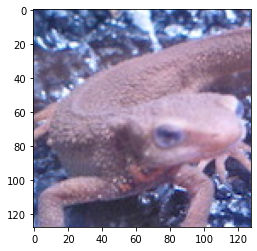

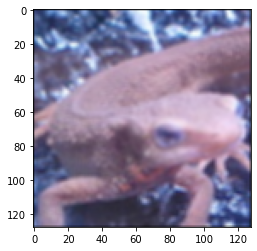

In [75]:
plt.imshow(img)
plt.show()

img1 = img.copy()
img1 = padding(img1,1)
img1 = getarea(img1,1,"average")
plt.imshow(img1)

## 运动滤波器(Motion Filter)
在滤波器中，取范围内的对角线的平均值填入中心点

In [77]:
def motFilter(area):
    #拉成一条，并且转置为横向
    area = area.reshape(-1,3).T
    #取出对角线的值，计算平均数
    area = area[:,[0,4,8]]
    newk = area.mean(axis=1)
    
    return newk

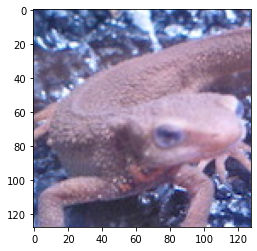

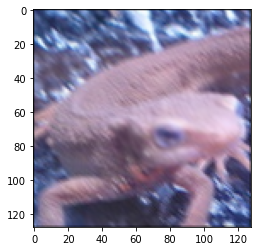

In [78]:
plt.imshow(img)
plt.show()

img2 = img.copy()
img2 = padding(img2,1)
img2 = getarea(img2,1,"motion")
plt.imshow(img2)

## MAX-MIN滤波器
在滤波器中，取范围内的最大值和最小值的差填入中心点

In [83]:
def maxminFilter(area):
    #拉成一条，并且转置为横向
    area = area.reshape(-1,1).T
    #取出对角线的值，计算平均数
    newk = area.max(axis=1)-area.min(axis=1)
    return newk

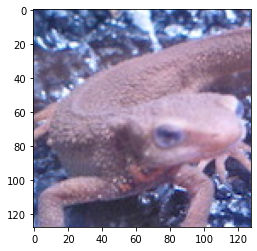

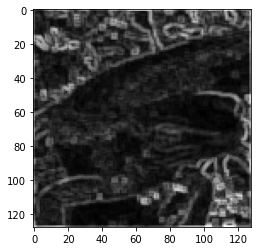

In [95]:
plt.imshow(img)
plt.show()

img3 = img.copy()
img3 = padding(img3,1)
img3 = gray(img3)
img3 = getarea(img3,1,"maxmin")
plt.imshow(img3,cmap='gray')

## 差分滤波器(Differential Filter)
纵向：在滤波器中，取范围内中心点的值和**上方**的值，两者之差填入中心点

横向：在滤波器中，取范围内中心点的值和**左方**的值，两者之差填入中心点


注意：有可能用较大值减去较小值

比如：180-181 = -1，由于数据类型是uint8，自动变成255

所以要取相减之后的绝对值

In [105]:
def diffFilter(area,isDirection):
    #isDirection为真是纵向，否则为横向
    #拉成一条，并且转置为横向
    area = area.reshape(-1,3).T
    #取出对角线的值，计算平均数
    x = area[:,4].astype(np.int)
    if isDirection:
        y = area[:,1].astype(np.int)
    else:
        y = area[:,3].astype(np.int)
    newk = np.abs(x-y).astype(np.uint8)
    return newk

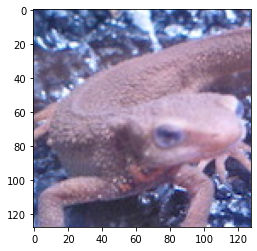

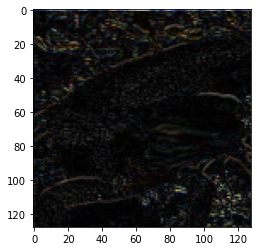

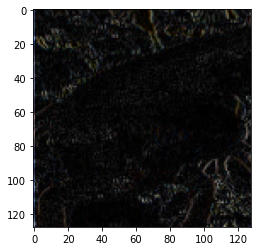

In [115]:
plt.imshow(img)
plt.show()

img4 = img.copy()
img4 = padding(img4,1)

img4_1 = getarea(img4,1,"differential_v")
plt.imshow(img4_1)
plt.show()
img4_2 = getarea(img4,1,"differential_h") 
plt.imshow(img4_2)

## Sobel滤波器
按照特定的滤波方式进行计算

[ 1  2  1 ]  

[ 0  0  0 ]

[-1 -2-1]


In [129]:
def sobelFilter(area,isDirection):
    #isDirection为真是纵向，否则为横向
    #拉成一条，并且转置为横向
    area = area.reshape(-1).T
    if isDirection:
        c = np.array([1,2,1,0,0,0,-1,-2,-1]).reshape(-1,1)
    else:
        c = np.array([1,0,-1,2,0,-2,1,0,-1]).reshape(-1,1)
    #计算滤波
    newk = np.dot(area,c)
     #将小于0的置0，大于255的置255
    newk = np.clip(newk, 0, 255)
    #转回uint8类型
    newk = newk.astype(np.uint8)
    return newk

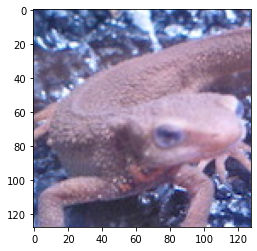

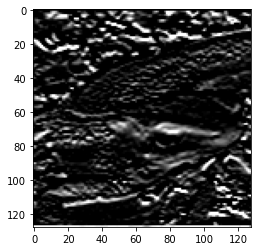

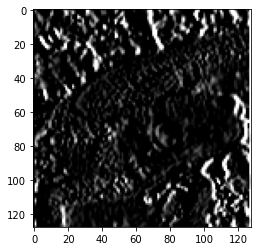

In [130]:
plt.imshow(img)
plt.show()

img5 = img.copy()
img5 = padding(img5,1)
img5 = gray(img5)
img5_1 = getarea(img5,1,"sobel_v")
plt.imshow(img5_1,cmap="gray")
plt.show()
img5_2 = getarea(img5,1,"sobel_h") 
plt.imshow(img5_2,cmap="gray")

## Prewitt滤波器
按照特定的滤波方式进行计算

[ -1 -1 -1 ]  

[ 0  0  0 ]

[1   1   1]

In [131]:
def prewittFilter(area,isDirection):
    #isDirection为真是纵向，否则为横向
    #拉成一条，并且转置为横向
    area = area.reshape(-1).T
    if isDirection:
        c = np.array([-1,-1,-1,0,0,0,1,1,1]).reshape(-1,1)
    else:
        c = np.array([-1,0,1,-1,0,1,-1,0,1]).reshape(-1,1)
    #计算滤波
    newk = np.dot(area,c)
     #将小于0的置0，大于255的置255
    newk = np.clip(newk, 0, 255)
    #转回uint8类型
    newk = newk.astype(np.uint8)
    return newk

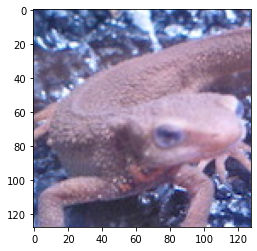

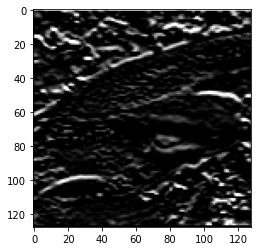

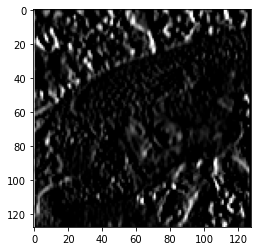

In [132]:
plt.imshow(img)
plt.show()

img6 = img.copy()
img6 = padding(img6,1)
img6 = gray(img6)
img6_1 = getarea(img6,1,"prewitt_v")
plt.imshow(img6_1,cmap="gray")
plt.show()
img6_2 = getarea(img6,1,"prewitt_h") 
plt.imshow(img6_2,cmap="gray")

## 拉普拉斯滤波器(Laplacian Filter)

对图像进行二次微分，微分方法为离散型

最后得出的式子为：
$$
\begin{align*}&\nabla^2\ I(x,y)\\=&I_{xx}(x,y)+I_{yy}(x,y)\\=&I(x-1,y) + I(x,y-1) - 4 * I(x,y) + I(x+1,y) + I(x,y+1)\end{align*}
$$

得出的滤波器形状如下：
$$
K=\left[\begin{matrix}0&1&0\\1&-4&1\\0&1&0\end{matrix}\right]
$$



In [133]:
def laplacianFilter(area):
    #isDirection为真是纵向，否则为横向
    #拉成一条，并且转置为横向
    area = area.reshape(-1).T
    
    c = np.array([0,1,0,1,-4,1,0,1,0]).reshape(-1,1)

    #计算滤波
    newk = np.dot(area,c)
    #将小于0的置0，大于255的置255
    newk = np.clip(newk, 0, 255)
    #转回uint8类型
    newk = newk.astype(np.uint8)
    return newk

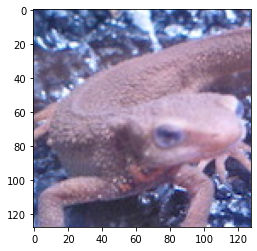

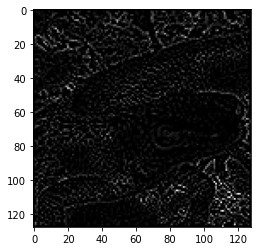

In [134]:
plt.imshow(img)
plt.show()

img7 = img.copy()
img7 = padding(img7,1)
img7 = gray(img7)
img7 = getarea(img7,1,"laplacian")
plt.imshow(img7,cmap="gray")

## Emboss滤波器
按照特定的滤波方式进行计算

[ -1 -1 -1 ]  

[ 0  0  0 ]

[1   1   1]

使物体的轮廓更加清晰

In [135]:
def embossFilter(area):
    #isDirection为真是纵向，否则为横向
    #拉成一条，并且转置为横向
    area = area.reshape(-1).T
    
    c = np.array([-2,-1,0,-1,1,1,0,1,2]).reshape(-1,1)

    #计算滤波
    newk = np.dot(area,c)
    #将小于0的置0，大于255的置255
    newk = np.clip(newk, 0, 255)
    #转回uint8类型
    newk = newk.astype(np.uint8)
    return newk

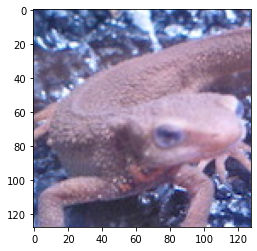

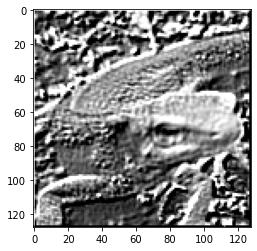

In [136]:
plt.imshow(img)
plt.show()

img8 = img.copy()

img8 = padding(img8,1)
img8 = gray(img8)
img8 = getarea(img8,1,"emboss")
plt.imshow(img8,cmap="gray")

## LoG滤波器
LoG即高斯-拉普拉斯滤波器，使用高斯平滑之后在使用拉普拉斯滤波器

就图像结果而言，感觉用中值滤波器更好

In [108]:
def gaussFilter(area):
    #拉成一条，用矩阵的乘法完成滤波计算，参考卷积核计算方法
    area = area.reshape(-1,3)
    
    kernel = np.array([1,2,1,2,4,2,1,2,1])*(1/16)
    
    newk = np.dot(kernel,area)
    newk = newk.astype(np.uint8)
    return newk

In [117]:
def medianFilter(area):
    #拉成一条，并且转置为横向
    area = area.reshape(-1,3).T
    #进行排序后取出中间值
    newk = np.sort(area,axis=1)[:,4]
    return newk

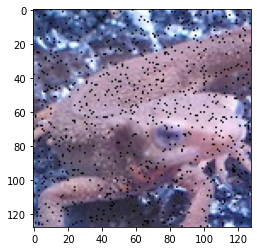

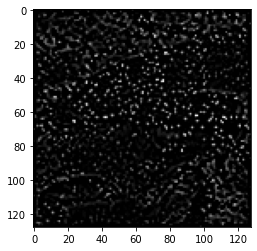

In [144]:
plt.imshow(img_noise)
plt.show()

img9 = img_noise.copy()
img9 = padding(img9,1)
img9 = getarea(img9,1,"gaussian")
#img9 = getarea(img9,1,"median")
img9 = padding(img9,1)
img9 = gray(img9)
img9 = getarea(img9,1,"laplacian")
plt.imshow(img9,cmap="gray")

## 直方图
使用matplotlib绘制imori_dark直方图
直方图展示了不同数值的像素出现的次数

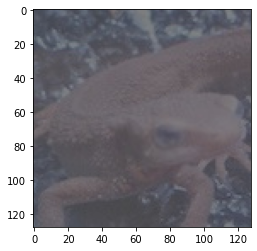

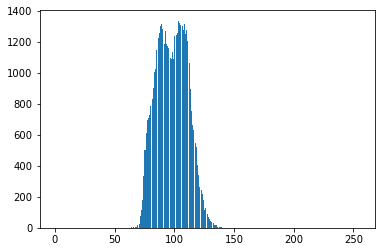

In [5]:
plt.imshow(img_dark)
plt.show()

img10 = img_dark.copy()
#img10 = img10.astype(np.float)
img10 = img10.reshape(-1)
hist = plt.hist(img10,bins=255,rwidth=0.85,range=(0,255))